<div align='center'><b>Axel BELLEC</b> - [M2SID] - Statistiques pour l'industrie</div>

# TP1

## 1. Fonction de répartition

### 1.1
 > Ecrire une fonction qui permet de calculer la fonction de répartition d'une gaussienne standard. Tracer cette fonction de répartition

In [2]:
import numpy as np
from scipy.special import erf

def cum_gauss_dist_std(x):
    return (1/2)*(1+erf(x/np.sqrt(2)));

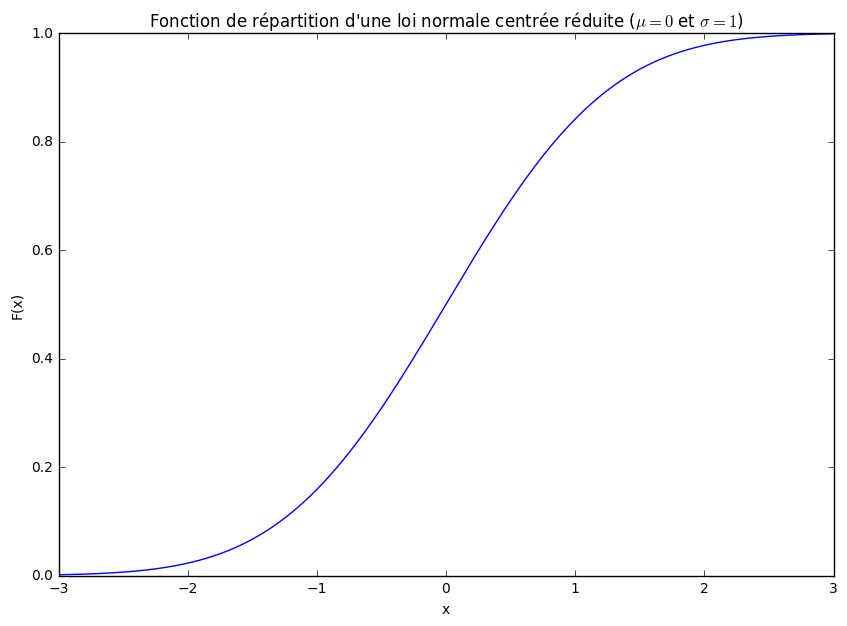

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 7)

x = np.arange(-3, 3, 0.01)

plt.plot(x, cum_gauss_dist_std(x))
plt.title(r"Fonction de répartition d'une loi normale centrée réduite ($\mu = 0$ et $\sigma = 1$)")
plt.xlabel('x')
plt.ylabel('F(x)')

### 1.2
> Vérification numérique


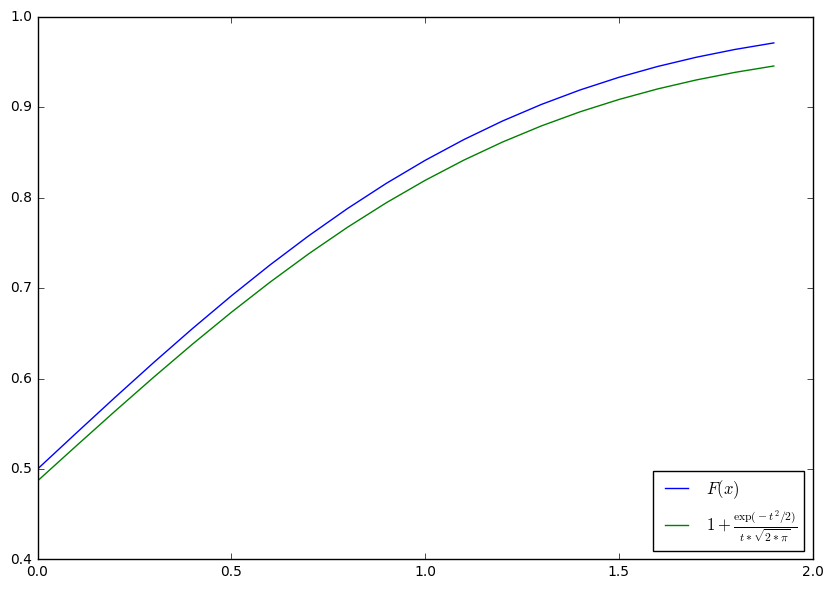

In [5]:
def check(t):
    x = np.arange(0, t, 0.1)
    y = cum_gauss_dist_std(x)
    expo = 1 + (np.exp(-t**2/2))/(t*np.sqrt(2*np.pi))
    equi = y/expo
    plt.plot(x, y, label=r'$F(x)$')
    plt.plot(x, equi, label=r'$1 + \frac{\exp(-t^2/2)}{t*\sqrt{2*\pi}}$')
    plt.legend(loc='lower right')
    
check(2)

### 1.3


In [7]:
def cum_gauss_dist(x, mu=0, sigma=1):
    return (1/2)*(1 + erf((x - mu) / np.sqrt(2 * sigma**2)));

Nous pouvons à présenter tester si notre fonction de répartition pour une gaussienne quelconque (`cum_gauss_dist`) nous renvoie les mêmes résultats que la fonction de répartition de la loi normale centrée réduite.

In [8]:
np.array_equal(cum_gauss_dist(x, 0, 1), cum_gauss_dist_std(x))

True

Nous obtenons bien les mêmes valeurs, on peut les afficher graphiquement :

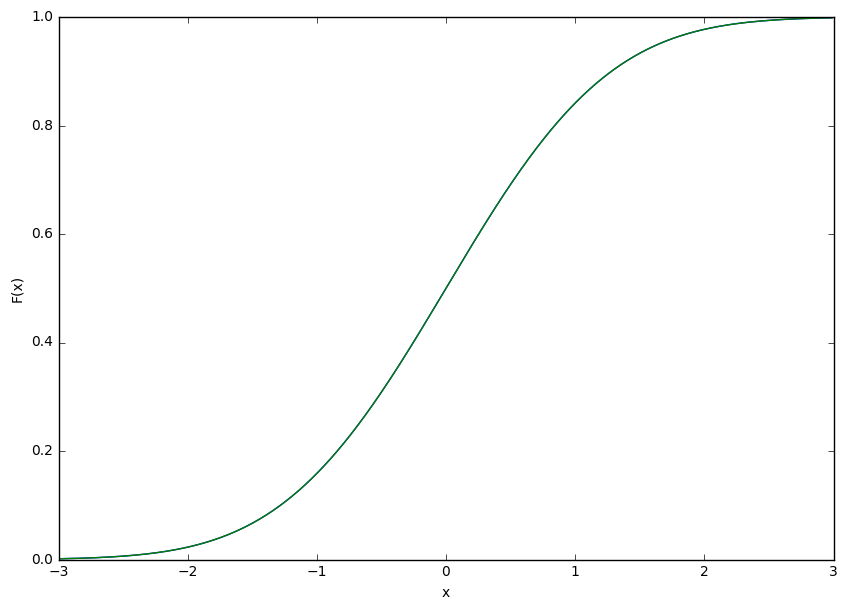

In [9]:
plt.plot(x, cum_gauss_dist(x))
plt.plot(x, cum_gauss_dist_std(x))
plt.xlabel(r'x')
plt.ylabel(r'F(x)')

## 2. Fonction de quantile

### 2.1
> Ecrire une fonction qui permet de calculer la fonction de quantile d'une gaussienne standard. Tracer cette fonction.

In [21]:
from scipy.special import erfinv


def q_gauss_dist_std(alpha):
    return np.sqrt(2) * erfinv(2*alpha -1)
 
q_gauss_dist_std(0.975)

1.959963984540054

On trace la fonction :

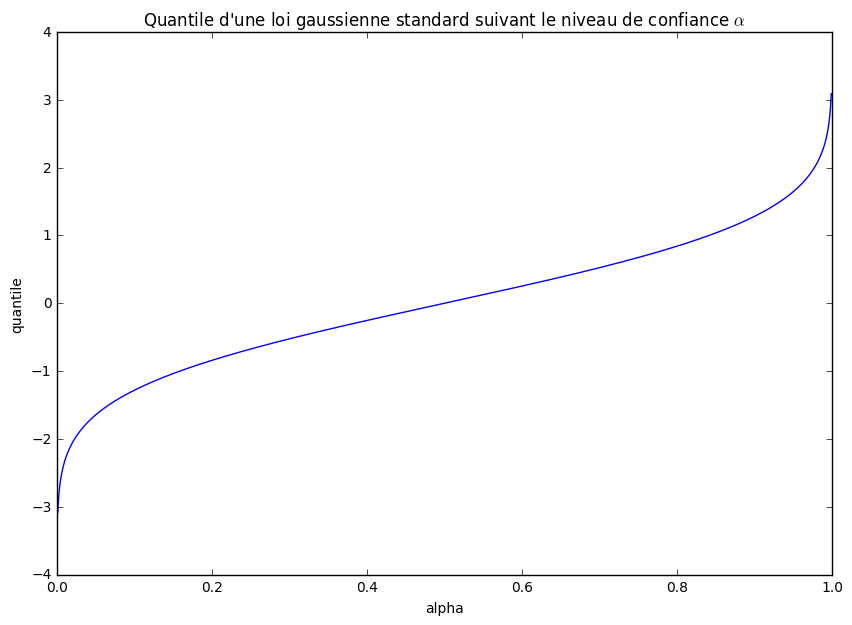

In [13]:
alphas = np.arange(0, 1, 0.001)
plt.plot(alphas, q_gauss_dist_std(alphas))
plt.title(r"Quantile d'une loi gaussienne standard suivant le niveau de confiance $\alpha$")
plt.xlabel('alpha')
plt.ylabel('quantile')

### 2.2
> Application à une gaussienne quelconque

In [26]:
def q_gauss_dist(alpha, mu=0, sigma=1):
    return mu + sigma*np.sqrt(2) * erfinv(2*alpha-1)

q_gauss_dist(0.975, 0, 1) 

1.959963984540054

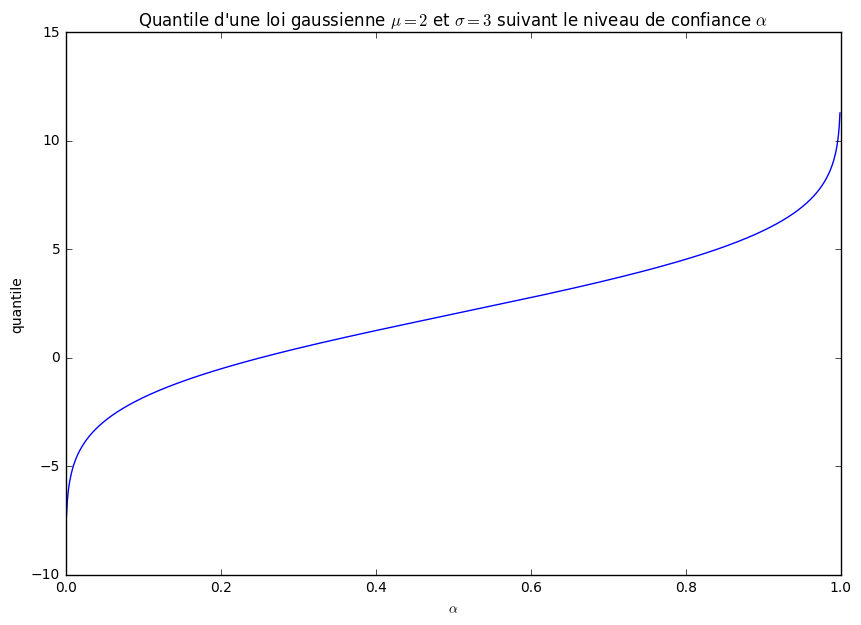

In [27]:
alphas = np.arange(0, 1, 0.001)
mu, sigma = 2, 3

plt.plot(alphas, q_gauss_dist(alphas, 2, 3))
plt.title(r"Quantile d'une loi gaussienne $\mu={0}$ et $\sigma={1}$ suivant le niveau de confiance $\alpha$".format(mu, sigma))
plt.xlabel(r'$\alpha$')
plt.ylabel('quantile')

### 2.3
> Utilisation de la fonction de quantile pour simuler des réalisations de variables gaussiennes

## 3. Moyenne empirique

### 3.1

> Simuler des réalisations de loi gaussiennes

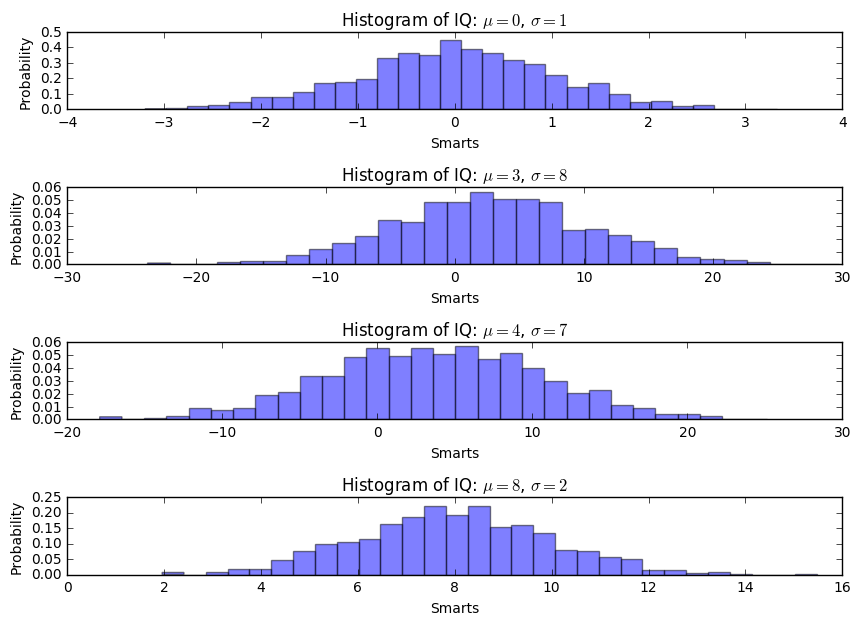

In [48]:
gauss_parameters = [
    (0, 1),
    (3, 8),
    (4, 7),
    (8, 2),
]

def simulation(parameters, n_obs=1000):
    num_bins = 30
    f, axarr = plt.subplots(len(parameters))
    for i, (mu, sigma) in enumerate(parameters):
        obs = mu + sigma * np.random.randn(n_obs)
        n, bins, patches = axarr[i].hist(obs, num_bins, normed=1, facecolor='blue', alpha=0.5)
        axarr[i].set_title(r'Histogram of IQ: $\mu={0}$, $\sigma={1}$'.format(mu, sigma))
        axarr[i].set_ylabel('Probability')
        axarr[i].set_xlabel('Smarts')
    plt.subplots_adjust(hspace=1.)
    plt.show()

simulation(gauss_parameters)

### 3.2
> Etude de l'évolution de la moyenne empirique des échantillons simulés en `3.1)` en fonction de la taille de l'échantillon

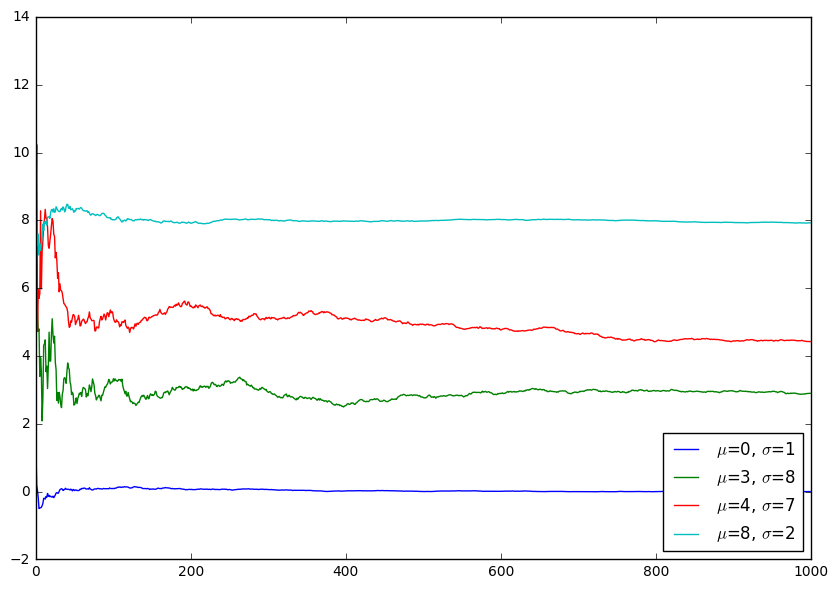

In [42]:
n = 1000

for mu, sigma in gauss_parameters:
    x = mu + sigma * np.random.randn(n)
    mean_evolution = [np.mean(x[:i+1]) for i in range(n)]
    plt.plot(mean_evolution, label=r'$\mu$={}, $\sigma$={}'.format(mu, sigma))
    
plt.legend(loc='lower right')

### 3.3
> Etude de l'évolution de la variance empirique des échantillons simulés en `3.1)` en fonction de la taille de l'échantillon

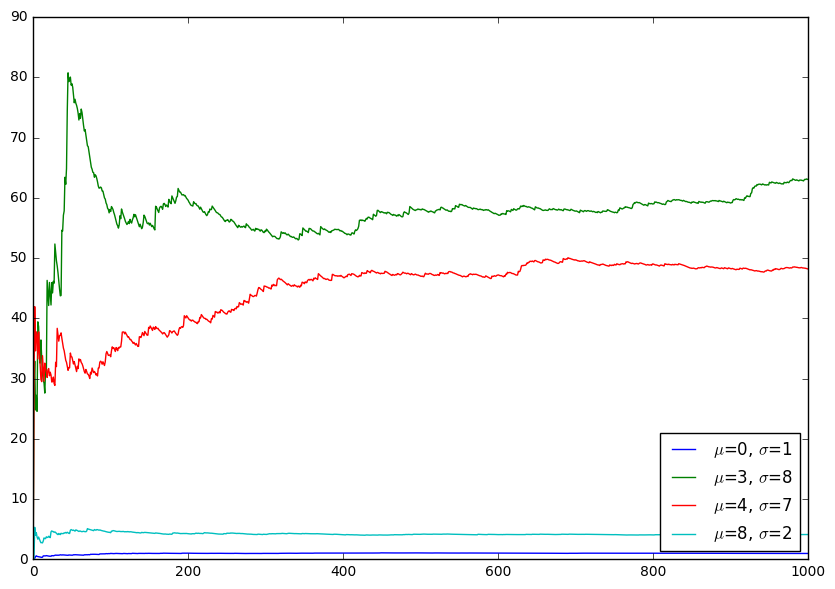

In [44]:
n = 1000

for mu, sigma in gauss_parameters:
    x = mu + sigma * np.random.randn(n)
    var_evolution = [np.var(x[:i+1]) for i in range(n)]
    plt.plot(var_evolution, label=r'$\mu$={}, $\sigma$={}'.format(mu, sigma))
    
plt.legend(loc='lower right')

## Test de normalité

In [47]:
obs = [8.41, 8.26, 7.99, 7.76, 7.56, 7.32, 8.41, 8.13, 7.86, 7.73, 7.44, 7.22, 8.32, 8.12, 7.85, 7.57, 7.35, 5.23]

### 4.1 
> Etude de la normalité de la série de données qualitativement

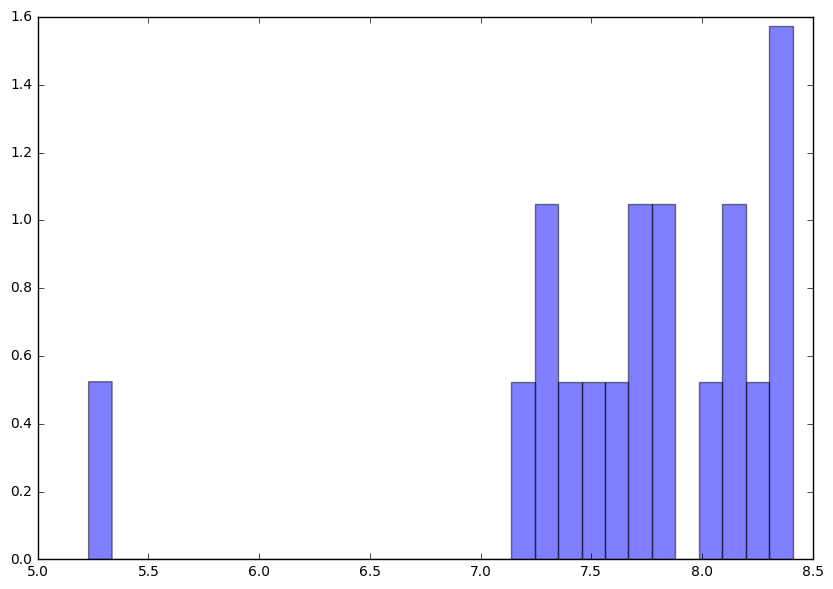

In [54]:
n, bins, patches = plt.hist(obs, 30, normed=1, facecolor='blue', alpha=0.5)

L'histogramme des valeurs nous montre que la distribution ne semble absolument pas suivre une distribution normale.

### 4.2
> Etude de la normalité suivant un test statistique

Pour tester si une distribution suit une loi normale, on peut mettre en place un test de Shapiro.

__Les hypothèses du test sont :__
  
$H_0$: L'échantillon suit une loi normale  
$H_1$: L'échantillon ne suit une loi normale

In [60]:
from scipy.stats import shapiro

_, p_value = shapiro(obs)

decision = "L'échantillon {} une loi normale.".format('ne suit pas' if p_value < 0.05 else 'suit')

print(decision)

L'échantillon ne suit pas une loi normale.


Comme la `p_value` est inférieure à notre $\alpha=5\%$, on rejette $H_0$ et on conclut que la distribution ne suit pas une loi normale.

### 4.3 
> On répète les étapes `4.1` et `4.2` en supprimant la valeur __5.23__ des observations.

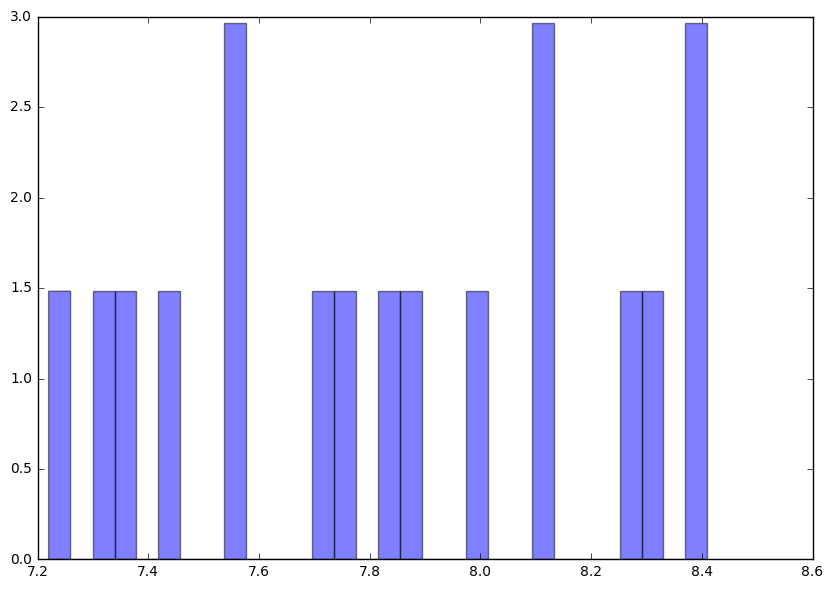

In [65]:
# On supprime la dernière valeur
obs_2 = obs[:-1] 
n, bins, patches = plt.hist(obs_2, 30, normed=1, facecolor='blue', alpha=0.5)

In [68]:
_, p_value = shapiro(obs_2)

decision = "L'échantillon {} une loi normale.".format('ne suit pas' if p_value < 0.05 else 'suit')
print(decision)

L'échantillon suit une loi normale.
